In [1]:
#@markdown This sets the warning status (default is `ignore`, since this notebook runs correctly)
warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

In [27]:
import numpy as np
import pickle
import os
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/))
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
from IPython.core.pylabtools import figsize
#@markdown This sets the resolution of the plot outputs (`retina` is the highest resolution)
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
%config InlineBackend.figure_format = notebook_screen_res

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams.update({'font.size': 35})

# matplotlib.rcParams.update({'font.size': 35})

def plot_auc(auc_details):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(auc_details['fpr'], auc_details['tpr'], label='AUC-ROC (area = {:.3f})'.format(auc_details['auc']))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.legend(loc='lower right')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.rcParams['savefig.facecolor']='white'
    plt.savefig(os.path.join('../figures/results', model_name+'_auc.png'), dpi=300)
    plt.show()
    plt.clf()

def plot_accuracy(history):
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.xlabel( "Epochs" )
    plt.ylabel( "Accuracy" )
    plt.ylim( [0.4,1.0] )
    plt.tight_layout()
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.rcParams['savefig.facecolor']='white'
    plt.savefig(os.path.join('../figures/results', model_name+'_accuracy.png'), dpi=300)
    plt.show()
    plt.clf()
    
def plot_loss(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.xlabel( "Epochs" )
    plt.ylabel( "Loss" )
    # plt.ylim( [0.4,1.0] )
    plt.tight_layout()
    plt.legend(['Training Loss', 'Validation Loss'])
    plt.rcParams['savefig.facecolor']='white'
    plt.savefig(os.path.join('../figures/results', model_name+'_loss.png'), dpi=300)
    plt.show()
    plt.clf()

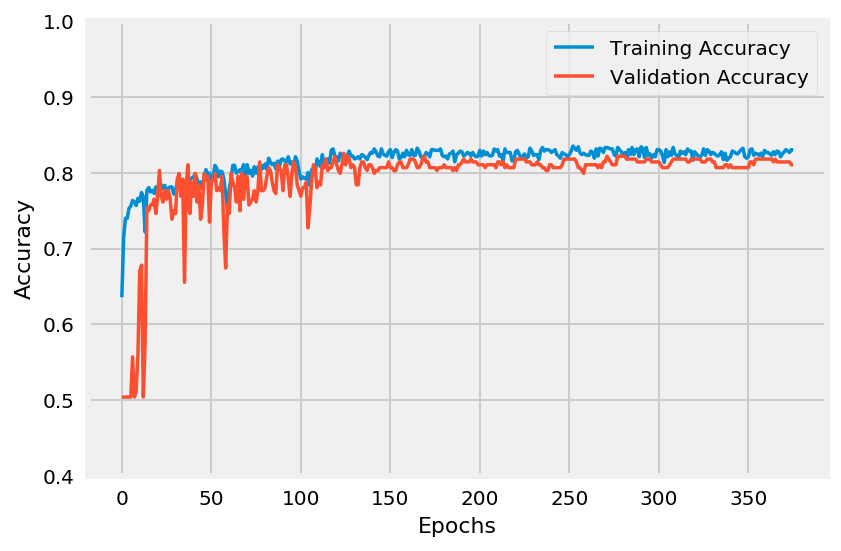

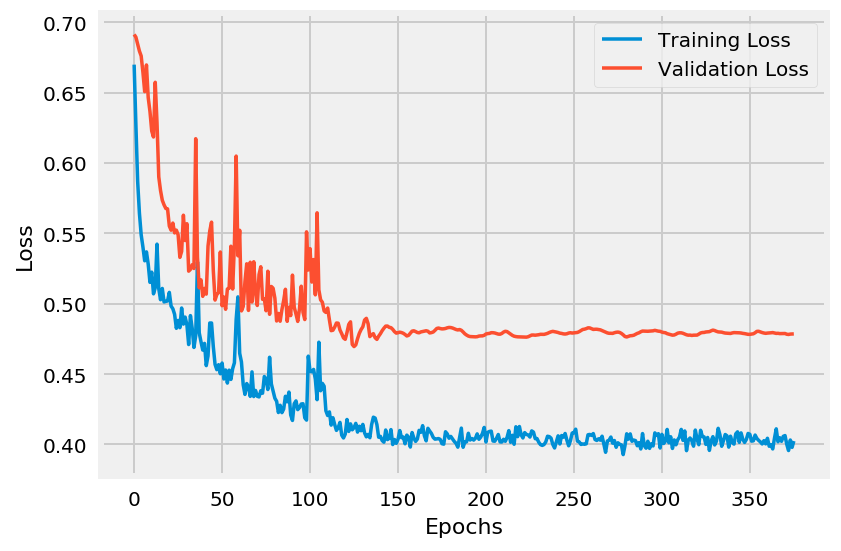

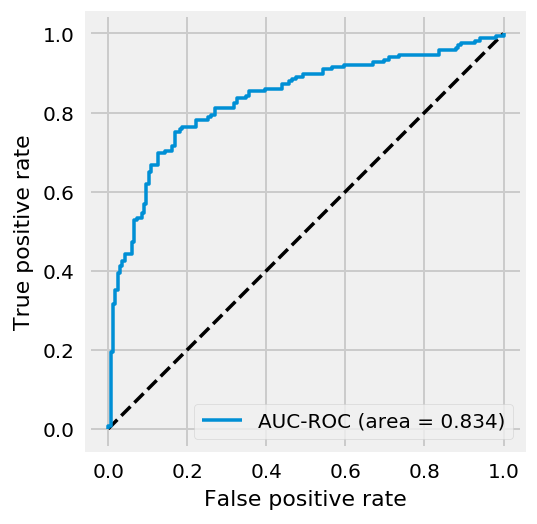

<Figure size 432x288 with 0 Axes>

In [28]:
model_path = '../trained_models/2020-03-03_StutterNet_C_upscaled_S1S2_kfold_no982_wg_782'
model_name = model_path.split('/')[-1]

with open(model_path + '_history.pkl','rb') as f: history = pickle.load(f)
with open(model_path + '_auc_details.pkl','rb') as f: auc_details = pickle.load(f)
    
plot_accuracy(history)
plot_loss(history)
plot_auc(auc_details)